In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, roc_auc_score, f1_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, Lasso
import time

import warnings
warnings.filterwarnings('ignore')

## 6.1

In [25]:
X=[]
y=[]
 
rng = np.random.RandomState(2022) 
X = rng.rand(100, 5000000)
y = rng.rand(100)


In [27]:
start_time = time.time()
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
# %time
ridge_time = time.time() - start_time
ridge_time

3.649522066116333

In [28]:
start_time = time.time()
kernel_ridge = KernelRidge(alpha=1.0)
kernel_ridge.fit(X,y)
# %time
kridge_time = time.time() - start_time
kridge_time

2.9478299617767334

Kernel ridge runs faster.    

This is because the closed form solution of kernel ridge does not include the multiplication of feature matrix, but ridge regression need to compute these operations which is extremely time-consuming especially for large feature matrix (needless to say we have 5000000 features in this question).
  


## 6.2

In [29]:
n_features = 500
samples = 1000

X62 = []
y62 = []
 
rng62 = np.random.RandomState(2022) 
X62 = rng.rand(1000, 500)
y62 = rng.rand(1000)


In [36]:
# Lasso regression with \lambda=0.001
lasso = Lasso(alpha=0.001)
start = time.time()
lasso.fit(X62, y62)
lasso_time = time.time() - start
lasso_time
lasso_coef = lasso.coef_
print('Lasso run time:', lasso_time)
print(lasso_coef)

# Ridge regression with \lambda=0.001
ridge62 = Ridge(alpha=0.001)
start = time.time()
ridge62.fit(X62, y62)
ridge62_time = time.time() - start
ridge62_time
ridge62_coef = ridge62.coef_
print('Ridge run time:', ridge62_time)
print(ridge62_coef)

Lasso run time: 0.01010274887084961
[ 0.00000000e+00 -6.13973204e-02  0.00000000e+00 -1.42587216e-02
 -0.00000000e+00  1.77780045e-03 -1.58707575e-02 -4.44234636e-02
 -0.00000000e+00 -1.19322915e-02  3.34758645e-02  8.98605780e-03
  4.34055546e-02 -1.98094662e-02 -0.00000000e+00  1.17157717e-02
  1.28734694e-02  1.94590980e-03  0.00000000e+00 -2.82617420e-02
  0.00000000e+00  0.00000000e+00 -1.11919137e-03  0.00000000e+00
  0.00000000e+00 -1.02134504e-02  2.59885950e-02  0.00000000e+00
 -2.29931086e-02  1.27969437e-02 -7.42086660e-03 -0.00000000e+00
  5.79533700e-02  6.12284984e-03  1.36225436e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  7.53837939e-04  5.00859392e-03
  0.00000000e+00  2.45408135e-02 -0.00000000e+00 -0.00000000e+00
 -6.81331608e-03  4.40070949e-02 -1.44584915e-03  0.00000000e+00
 -0.00000000e+00 -1.91402002e-02 -0.00000000e+00 -4.88747726e-03
 -0.00000000e+00  0.00000000e+00  4.22719063e-02 -1.87312812e-02
  0.00000000e+00 -0.00000000e+00  3.56544418e-02 -6.90

In [37]:
# Lasso regression with \lambda=0.1
lasso = Lasso(alpha=0.01)
start = time.time()
lasso.fit(X62, y62)
lasso_time = time.time() - start
lasso_time
lasso_coef = lasso.coef_
print('Lasso run time:', lasso_time)
print(lasso_coef)

# Ridge regression with \lambda=0.1
ridge62 = Ridge(alpha=0.01)
start = time.time()
ridge62.fit(X62, y62)
ridge62_time = time.time() - start
ridge62_time
ridge62_coef = ridge62.coef_
print('Ridge run time:', ridge62_time)
print(ridge62_coef)

Lasso run time: 0.011376142501831055
[-0. -0. -0.  0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.  0.  0.  0. -0.
  0. -0.  0.  0. -0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0. -0.
  0. -0.  0. -0.  0.  0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.  0.
  0. -0.  0.  0.  0. -0.  0.  0. -0.  0. -0.  0.  0.  0. -0. -0. -0.  0.
 -0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.
  0.  0.  0. -0.  0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0.  0.
 -0.  0.  0. -0.  0.  0. -0. -0.  0.  0.  0.  0. -0. -0. -0. -0.  0.  0.
  0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0. -0. -0.  0. -0.  0. -0.  0.
  0. -0. -0. -0. -0.  0.  0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.
  0. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0.  0.  0.
 -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0.  0. -0. -0. -0.  0.  0.  0.
  0. -0. -0. -0.  0. -0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.  0.  0.
  0.  0. -0. -0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0.
  0.  0. -0. -

The coefficients of Lasso regression has more zero than that of ridge.   

The reason we want to chooses Lasso over ridge is that ridge can't zero out coefficients, resulting in all the coefficients included in the model. In contrast, Lasso regression does both parameter shrinkage and variable selection automatically. 

## 6.3 

In [32]:
alphas = np.linspace(0.001, 100)

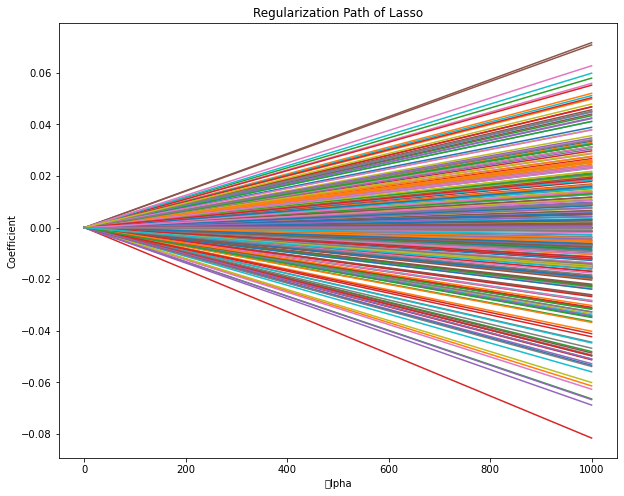

In [33]:
# Lasso

coef_mat = pd.DataFrame()
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X62, y62)
    lasso_coef = lasso.coef_
    coef_mat[1 / alpha] = lasso_coef

fig, ax = plt.subplots(figsize=(10,8))

coef_mat.T.plot(ax=ax, legend=False, xlabel= u'$\alpha$', 
                ylabel='Coefficient', title='Regularization Path of Lasso');
# ax.get_legend().remove()

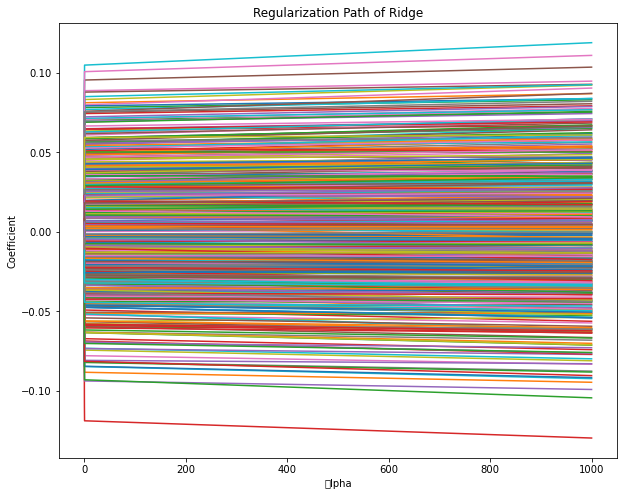

In [34]:
# Ridge
coef_mat_r = pd.DataFrame()
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X62, y62)
    ridge_coef = ridge.coef_
    coef_mat_r[1 / alpha] = ridge_coef
  
fig, ax = plt.subplots(figsize=(10,8))
coef_mat_r.T.plot(ax=ax, legend=False, xlabel= u'$\alpha$', 
                ylabel='Coefficient', title='Regularization Path of Ridge');
